## Regression model using Functional API and heterogeneous model architecture

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')

## Boston housing regression dataset

In [3]:
boston_housing=tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = boston_housing

In [5]:
X_train_full.shape

(404, 13)

In [6]:
X_train, y_train = X_train_full[:-50], y_train_full[:-50]
X_valid, y_valid = X_train_full[-50:], y_train_full[-50:]

X_new=X_test[:3]
y_new=y_test[:3]

In [7]:
X_train.shape

(354, 13)

In [8]:
X_train.dtype

dtype('float64')

In [9]:
tf.random.set_seed(42)

In [10]:
#normalization_layer=K.layers.Normalization()
#hidden_layer1=K.layers.Dense(30, activation='relu')
#hidden_layer2=K.layers.Dense(30, activation='relu')
#concat_layer=K.layers.Concatenate()
#output_layer=K.layers.Dense(1)

In [ ]:
# Sigle input model
#input_=K.layers.Input(shape=X_train.shape[1:])
#normalized=normalization_layer(input_)
#hidden1=hidden_layer1(normalized)
#hidden2=hidden_layer2(hidden1)
#concat=concat_layer([normalized, hidden2])
#output=output_layer(concat)

## Wide and Deep Model: multiple inputs different paths model

In [11]:
input_wide=K.layers.Input(shape=[5], name='input_wide')
input_deep=K.layers.Input(shape=[8], name='input_deep')

norm_layer_wide=K.layers.Normalization()
norm_layer_deep=K.layers.Normalization()

norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)

hidden1=K.layers.Dense(30, activation='relu')(norm_deep)
hidden2=K.layers.Dense(30, activation='relu')(hidden1)

concat=K.layers.Concatenate()([norm_wide, hidden2])

output=K.layers.Dense(1, name='output')(concat)
aux_output=K.layers.Dense(1, name='aux_output')(hidden2)

In [ ]:
#model=K.Model(inputs=input_, outputs=output)

In [12]:
model=K.Model(inputs=[input_wide, input_deep], 
              outputs=[output, aux_output])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 8)]          0           []                               
                                                                                                  
 normalization_3 (Normalization  (None, 8)           17          ['input_deep[0][0]']             
 )                                                                                                
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['normalization_3[0][0]']    

In [14]:
model.layers

In [15]:
optimizer=K.optimizers.Adam(lr=1e-3)

## Passing loss and loss weighting dicts based on named model outputs

In [16]:
loss_dict={'output':'mse',
            'aux_output':'mse'}

loss_weights_dict={'output':0.9,
                   'aux_output':0.1}

In [17]:
model.compile(loss=loss_dict,
              loss_weights=loss_weights_dict,
              optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [19]:
X_train_wide, X_train_deep=X_train[:, :5], X_train[:, 5:]
X_valid_wide, X_valid_deep=X_valid[:, :5], X_valid[:, 5:]
X_test_wide, X_test_deep=X_test[:, :5], X_test[:, 5:]

X_new_wide, X_new_deep=X_test_wide[:3], X_test_deep[:3]
y_new=y_test[:3]

In [20]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

## Passing input data as dicts based on named model inputs

In [35]:
input_dict={'input_wide':X_train_wide, 'input_deep':X_train_deep}
input_valid_dict={'input_wide':X_valid_wide, 'input_deep':X_valid_deep}
target_dict={'output':y_train, 'aux_output':y_train}
target_valid_dict={'output':y_valid, 'aux_output':y_valid}

input_test_dict={'input_wide':X_test_wide, 'input_deep':X_test_deep}
target_test_dict={'output':y_test, 'aux_output':y_test}

X_new_dict={'input_wide':X_new_wide, 'input_deep':X_new_deep}

## Training and retrieving history object

In [23]:
history = model.fit(input_dict,
                    target_dict,
                    epochs=30,
                    validation_data=(input_valid_dict, target_valid_dict))

Epoch 1/30
 1/12 [=>............................] - ETA: 15s - loss: 516.7260 - output_loss: 517.3488 - aux_output_loss: 511.1210 - output_root_mean_squared_error: 22.7453 - aux_output_root_mean_squared_error: 22.6080

2022-11-28 23:46:39.634162: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


12/12 [==============================] - 2s 22ms/step - loss: 576.1303 - output_loss: 576.7944 - aux_output_loss: 570.1533 - output_root_mean_squared_error: 24.0165 - aux_output_root_mean_squared_error: 23.8779 - val_loss: 538.0357 - val_output_loss: 537.9349 - val_aux_output_loss: 538.9426 - val_output_root_mean_squared_error: 23.1934 - val_aux_output_root_mean_squared_error: 23.2151
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 557.3365 - output_loss: 556.8776 - aux_output_loss: 561.4667 - output_root_mean_squared_error: 23.5983 - aux_output_root_mean_squared_error: 23.6953 - val_loss: 519.8203 - val_output_loss: 518.6968 - val_aux_output_loss: 529.9319 - val_output_root_mean_squared_error: 22.7749 - val_aux_output_root_mean_squared_error: 23.0202
Epoch 3/30
12/12 [==============================] - 0s 6ms/step - loss: 535.6300 - output_loss: 534.0551 - aux_output_loss: 549.8047 - output_root_mean_squared_error: 23.1096 - aux_output_root_mean_squared_error: 2

Epoch 22/30
12/12 [==============================] - 0s 4ms/step - loss: 27.7441 - output_loss: 27.2246 - aux_output_loss: 32.4200 - output_root_mean_squared_error: 5.2177 - aux_output_root_mean_squared_error: 5.6939 - val_loss: 30.0058 - val_output_loss: 29.4407 - val_aux_output_loss: 35.0919 - val_output_root_mean_squared_error: 5.4259 - val_aux_output_root_mean_squared_error: 5.9238
Epoch 23/30
12/12 [==============================] - 0s 8ms/step - loss: 26.5819 - output_loss: 26.1790 - aux_output_loss: 30.2083 - output_root_mean_squared_error: 5.1165 - aux_output_root_mean_squared_error: 5.4962 - val_loss: 28.6540 - val_output_loss: 28.1886 - val_aux_output_loss: 32.8423 - val_output_root_mean_squared_error: 5.3093 - val_aux_output_root_mean_squared_error: 5.7308
Epoch 24/30
12/12 [==============================] - 0s 5ms/step - loss: 25.7163 - output_loss: 25.3941 - aux_output_loss: 28.6158 - output_root_mean_squared_error: 5.0393 - aux_output_root_mean_squared_error: 5.3494 - val

In [24]:
history.params['epochs']


30

In [50]:
history.history

{'loss': [576.1303100585938,
  557.3364868164062,
  535.6300048828125,
  509.354248046875,
  477.8096008300781,
  438.7619323730469,
  392.90582275390625,
  339.43389892578125,
  280.3338928222656,
  220.63055419921875,
  162.67764282226562,
  116.3951187133789,
  81.40191650390625,
  61.525390625,
  50.26583480834961,
  43.74690628051758,
  39.48094177246094,
  35.88688278198242,
  33.1326789855957,
  30.755088806152344,
  29.088111877441406,
  27.744117736816406,
  26.581928253173828,
  25.7163028717041,
  24.9107723236084,
  24.104825973510742,
  23.588167190551758,
  22.938907623291016,
  22.51883316040039,
  22.055387496948242],
 'output_loss': [576.79443359375,
  556.8776245117188,
  534.0551147460938,
  506.60247802734375,
  473.81298828125,
  433.37152099609375,
  386.09503173828125,
  331.22503662109375,
  270.9139709472656,
  210.46510314941406,
  152.39903259277344,
  106.86714172363281,
  73.37198638916016,
  55.42275619506836,
  45.957218170166016,
  40.73274612426758,
  3

<AxesSubplot: >

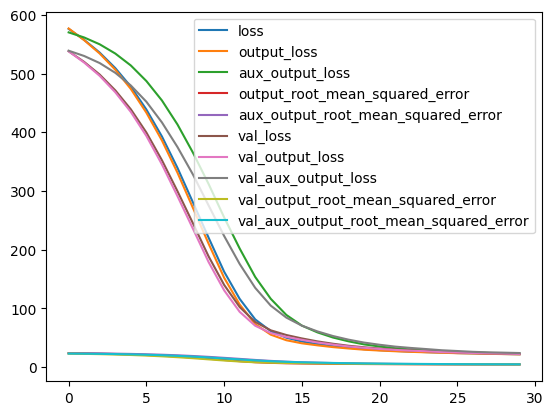

In [52]:
pd.DataFrame(history.history).plot()

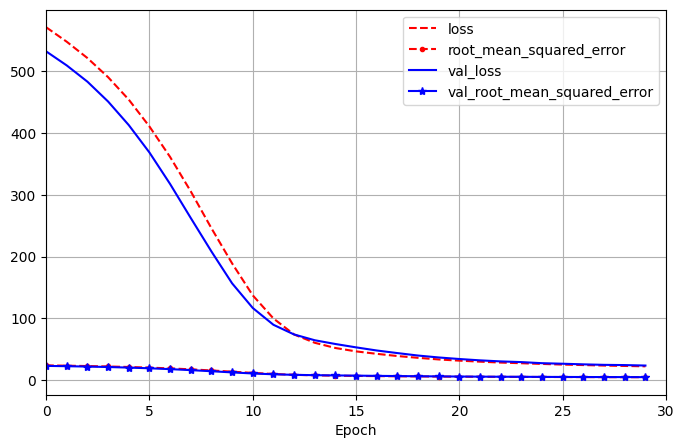

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                  xlim=[0, history.params['epochs']],
                                  #ylim=[0, 1],
                                  grid=True,
                                  xlabel='Epoch',
                                  style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Model evaluation

In [33]:
eval_results=model.evaluate(input_test_dict,
                           target_test_dict,
                           return_dict=True)

4/4 [==============================] - 0s 2ms/step - loss: 23.9921 - output_loss: 23.6823 - aux_output_loss: 26.7795 - output_root_mean_squared_error: 4.8665 - aux_output_root_mean_squared_error: 5.1749


In [34]:
eval_results.keys()

dict_keys(['loss', 'output_loss', 'aux_output_loss', 'output_root_mean_squared_error', 'aux_output_root_mean_squared_error'])

In [31]:
eval_results

[23.992063522338867,
 23.682348251342773,
 26.77947235107422,
 4.866451263427734,
 5.174888610839844]

In [38]:
y_pred_tuple=model.predict(X_new_dict)

1/1 [==============================] - 0s 24ms/step


In [39]:
y_pred=dict(zip(model.output_names, y_pred_tuple))

In [40]:
y_pred

{'output': array([[12.446853],
        [15.057083],
        [20.82257 ]], dtype=float32),
 'aux_output': array([[13.9465685],
        [14.308627 ],
        [20.058002 ]], dtype=float32)}

In [30]:
y_new

array([ 7.2, 18.8, 19. ])

In [41]:
model.output_names

['output', 'aux_output']

In [42]:
model.output_shape

[(None, 1), (None, 1)]

In [43]:
model.outputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'output')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'aux_output')>]

In [44]:
model.input_mask

[None, None]

In [45]:
model.input_names

['input_wide', 'input_deep']

In [49]:
model.loss

{'output': 'mse', 'aux_output': 'mse'}